<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
!pip install statsmodels



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols





#### Read the dataset in the csv file from the URL


In [3]:
df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [4]:
 df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [5]:
df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [6]:
# Remove the unnecessary column
df = df.drop(columns=['Unnamed: 0'])

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [8]:
# Check for missing values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [11]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
LSTAT      float64
MEDV       float64
dtype: object

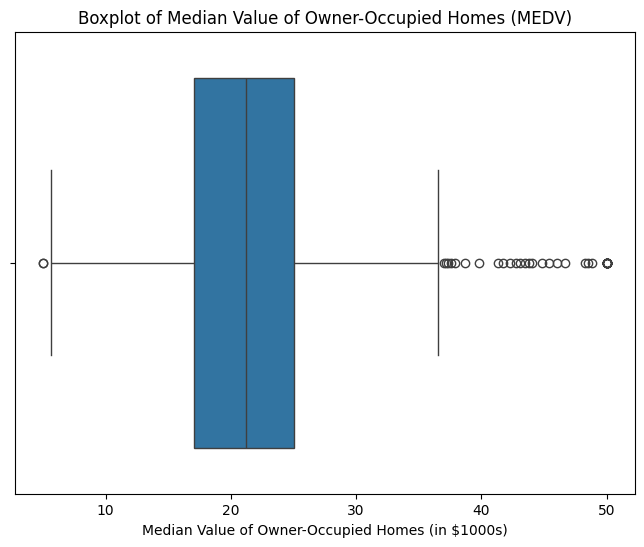

In [12]:
# Boxplot for MEDV
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.xlabel('Median Value of Owner-Occupied Homes (in $1000s)')
plt.show()

C:\Users\okeya\AppData\Local\Temp\ipykernel_32108\40738683.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CHAS', data=df, palette='pastel')


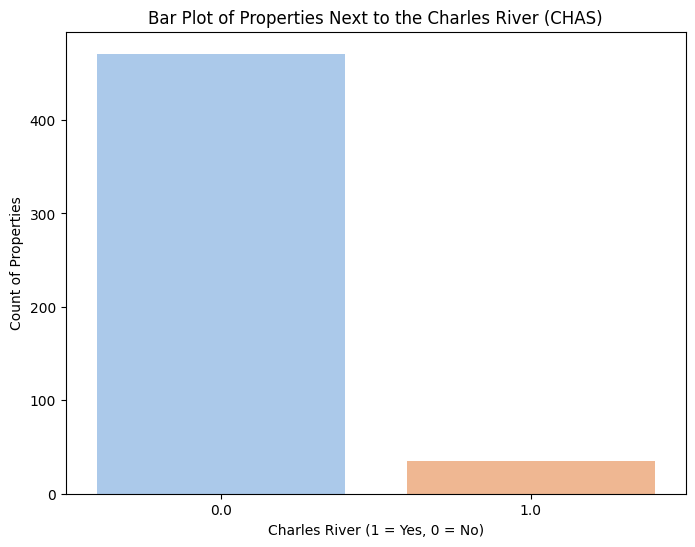

In [13]:
# Bar plot for CHAS
plt.figure(figsize=(8, 6))
sns.countplot(x='CHAS', data=df, palette='pastel')
plt.title('Bar Plot of Properties Next to the Charles River (CHAS)')
plt.xlabel('Charles River (1 = Yes, 0 = No)')
plt.ylabel('Count of Properties')
plt.show()


C:\Users\okeya\AppData\Local\Temp\ipykernel_32108\2188494876.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AGE_GROUP', y='MEDV', data=df, palette='Set3')


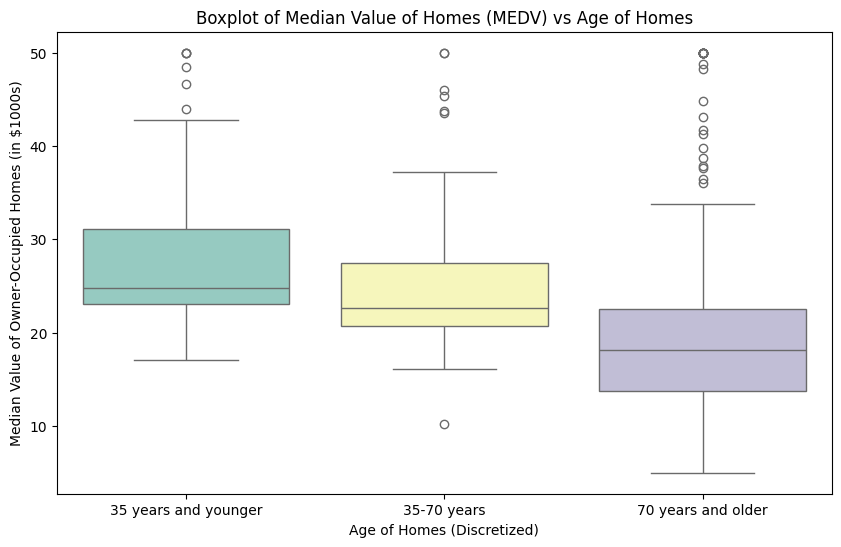

In [14]:
# Discretize AGE into three groups
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', '35-70 years', '70 years and older'])

# Boxplot for MEDV vs. AGE_GROUP
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=df, palette='Set3')
plt.title('Boxplot of Median Value of Homes (MEDV) vs Age of Homes')
plt.xlabel('Age of Homes (Discretized)')
plt.ylabel('Median Value of Owner-Occupied Homes (in $1000s)')
plt.show()


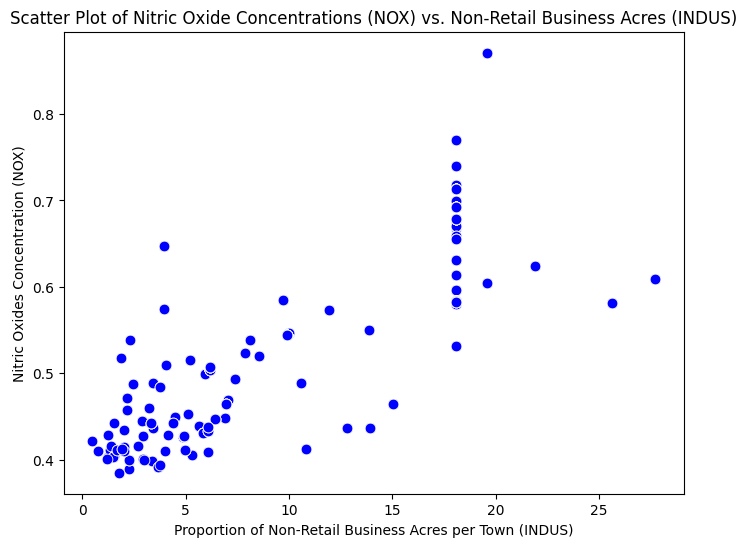

In [15]:
# Scatter plot for NOX vs. INDUS
plt.figure(figsize=(8, 6))
sns.scatterplot(x='INDUS', y='NOX', data=df, color='blue', s=60)
plt.title('Scatter Plot of Nitric Oxide Concentrations (NOX) vs. Non-Retail Business Acres (INDUS)')
plt.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
plt.ylabel('Nitric Oxides Concentration (NOX)')
plt.show()


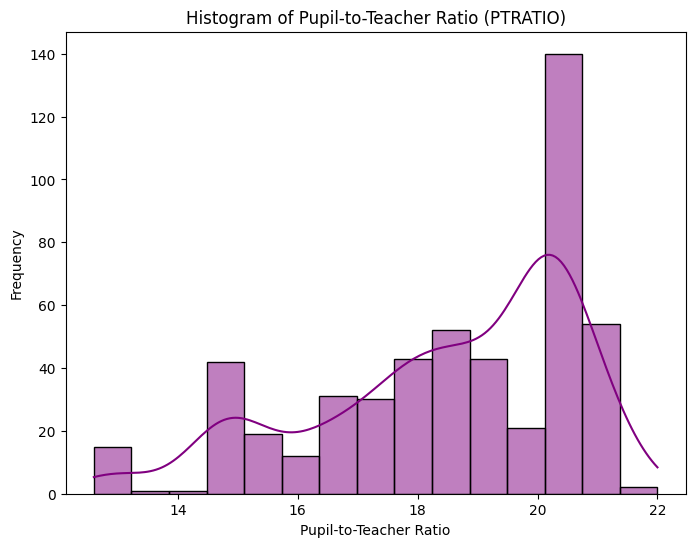

In [16]:
# Histogram for PTRATIO
plt.figure(figsize=(8, 6))
sns.histplot(df['PTRATIO'], bins=15, kde=True, color='purple')
plt.title('Histogram of Pupil-to-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-to-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


To answer these questions, I will perform the appropriate statistical tests. For each analysis, I will state the hypothesis, use an alpha level of 0.05, perform the test, and provide the conclusions based on the results.

1. T-test for Independent Samples: Difference in Median Value of Houses Bounded by the Charles River (CHAS)
Hypothesis:
Null Hypothesis (H0): There is no significant difference in the median value of houses (MEDV) bounded by the Charles River (CHAS = 1) or not (CHAS = 0).
Alternative Hypothesis (H1): There is a significant difference in the median value of houses (MEDV) bounded by the Charles River or not.
Test:
I will perform a T-test for independent samples to test the difference between the two groups (CHAS = 1 and CHAS = 0).

In [17]:
# Split data into two groups
medv_chas_1 = df[df['CHAS'] == 1]['MEDV']
medv_chas_0 = df[df['CHAS'] == 0]['MEDV']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(medv_chas_1, medv_chas_0)

print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the median value of houses bounded by the Charles River or not.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the median value of houses bounded by the Charles River or not.")


T-statistic: 3.9964, P-value: 0.0001
Reject the null hypothesis: There is a significant difference in the median value of houses bounded by the Charles River or not.


ANOVA: Difference in Median Values of Houses (MEDV) Across Age Groups (AGE)
Hypothesis:
Null Hypothesis (H0): There is no significant difference in median values of houses (MEDV) across different age groups (AGE).
Alternative Hypothesis (H1): There is a significant difference in median values of houses (MEDV) across different age groups.
Test:
I will use ANOVA to determine if there are significant differences in MEDV across different age groups. First, I need to discretize the AGE variable into appropriate groups as done previously.

In [18]:
# Discretize AGE into three groups as done previously
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', '35-70 years', '70 years and older'])

# ANOVA test
model = ols('MEDV ~ AGE_GROUP', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

# Conclusion
p_value = anova_table['PR(>F)'][0]
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the median values of houses across different age groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the median values of houses across different age groups.")


                 sum_sq     df         F        PR(>F)
AGE_GROUP   5401.731883    2.0  36.40765  1.710501e-15
Residual   37314.563532  503.0       NaN           NaN
Reject the null hypothesis: There is a significant difference in the median values of houses across different age groups.


C:\Users\okeya\AppData\Local\Temp\ipykernel_32108\2256935615.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]


 **Pearson Correlation:**
 
  Relationship Between Nitric Oxide Concentrations (NOX) and Proportion of Non-Retail Business Acres (INDUS)
Hypothesis:
Null Hypothesis (H0): There is no relationship between nitric oxide concentrations (NOX) and the proportion of non-retail business acres (INDUS).
Alternative Hypothesis (H1): There is a relationship between nitric oxide concentrations (NOX) and the proportion of non-retail business acres (INDUS).
Test:
I will use the Pearson correlation coefficient to test the relationship between NOX and INDUS.



In [19]:
# Pearson correlation test
corr_coef, p_value = stats.pearsonr(df['NOX'], df['INDUS'])

print(f"Pearson Correlation Coefficient: {corr_coef:.4f}, P-value: {p_value:.4f}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.")


Pearson Correlation Coefficient: 0.7637, P-value: 0.0000
Reject the null hypothesis: There is a significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.


**Regression Analysis:**

 Impact of Distance to Employment Centers (DIS) on Median Value of Homes (MEDV)
Hypothesis:
Null Hypothesis (H0): There is no impact of the weighted distance to the five Boston employment centers (DIS) on the median value of owner-occupied homes (MEDV).
Alternative Hypothesis (H1): There is an impact of the weighted distance to the five Boston employment centers (DIS) on the median value of owner-occupied homes (MEDV).
Test:
We will use simple linear regression to determine the impact of DIS on MEDV.

In [20]:

# Regression analysis
X = df['DIS']
y = df['MEDV']
X = sm.add_constant(X)  # Adds a constant term to the predictor

model = sm.OLS(y, X).fit()
print(model.summary())

# Conclusion
p_value = model.pvalues[1]  # Get the p-value for the DIS coefficient
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant impact of distance to employment centers on the median value of owner-occupied homes.")
else:
    print("Fail to reject the null hypothesis: There is no significant impact of distance to employment centers on the median value of owner-occupied homes.")


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           1.21e-08
Time:                        07:29:21   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

C:\Users\okeya\AppData\Local\Temp\ipykernel_32108\3375551301.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]  # Get the p-value for the DIS coefficient
